In [6]:
import pydub
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
from scipy.stats import pearsonr

In [4]:
# importing audio

def normalize(sig):
    return sig / np.max(np.abs(sig))

audio_piano, sr_piano = librosa.load("piano.mp3", sr=None, mono=True)
audio_voice,  sr_voice = librosa.load("voice.mp3", sr=None, mono=True)
audio_timbal, sr_timbal = librosa.load("timbal.mp3", sr=None, mono=True)

min_len = len(audio_piano)
audio_timbal  = audio_timbal[:min_len]
audio_voice  = audio_voice[:min_len]

mixed_audio = audio_piano + audio_voice + audio_timbal
mixed_audio = normalize(mixed_audio)

sf.write("mix.wav", mixed_audio, sr_piano)


In [5]:
# train and prediction

def linear_function(x):
    return x

def adaline_predict(X, weights):
    return linear_function(np.dot(X, weights[1:,:]) + weights[0,:]) # w * x + b

def adaline_train(X, Y, learning_rate, epochs):
    weights = np.random.rand(X.shape[1] + 1, Y.shape[1])
    errors = []

    for _ in range(epochs):
        total_error = 0

        for xi, target in zip(X, Y):

            output = adaline_predict(xi, weights)
            error = target - output
            total_error += learning_rate * error

            update = 2 * learning_rate * error
            weights[1:,:] += np.outer(xi, update)
            weights[0,:] += update

        errors.append(total_error)
        print(total_error)

    return weights, errors

In [ ]:
# parameters

delay = 1200
n_samples = len(mixed_audio)
X = np.array([mixed_audio[i:i + delay] for i in range(n_samples - delay)])
Y = np.column_stack([
    audio_piano[delay:],
    audio_voice[delay:],
    audio_timbal[delay:]
])

# train
weights, errors = adaline_train(X, Y, learning_rate = 0.001, epochs = 1000)

# predict
predictions =np.array([adaline_predict(xi, weights) for xi in X])

sep_piano  = predictions[:,0]
sep_voice  = predictions[:,1]
sep_timbal = predictions[:,2]


In [ ]:
# save new audios

sep_piano  = normalize(sep_piano)
sep_voice  = normalize(sep_voice)
sep_timbal = normalize(sep_timbal)

sf.write("sep_piano.wav",  sep_piano,  sr_piano)
sf.write("sep_voice.wav", sep_voice,  sr_voice)
sf.write("sep_timbal.wav", sep_timbal, sr_timbal)
print(len(sep_piano))


101951


In [ ]:
# correlation

corr_piano, _  = pearsonr(sep_piano, audio_piano[delay:])
corr_voice, _  = pearsonr(sep_voice, audio_voice[delay:])
corr_timbal, _ = pearsonr(sep_timbal, audio_timbal[delay:])

print("Correlation piano:", corr_piano)
print("Correlation voice:", corr_voice)
print("Correlation timbal:", corr_timbal)


Correlation piano: 0.3746760567354596
Correlation voice: 0.687562749062482
Correlation timbal: 0.5050723200592201


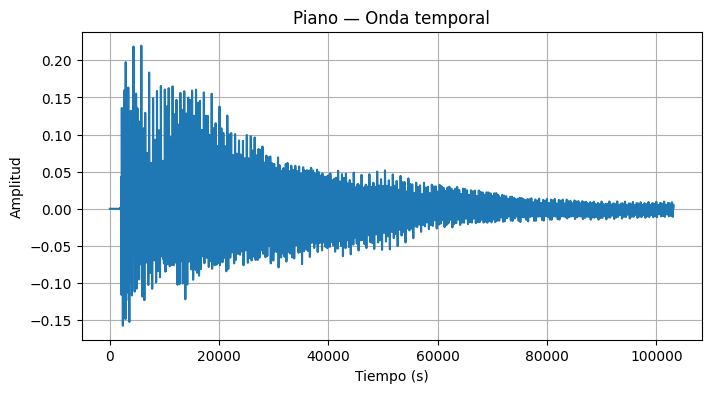

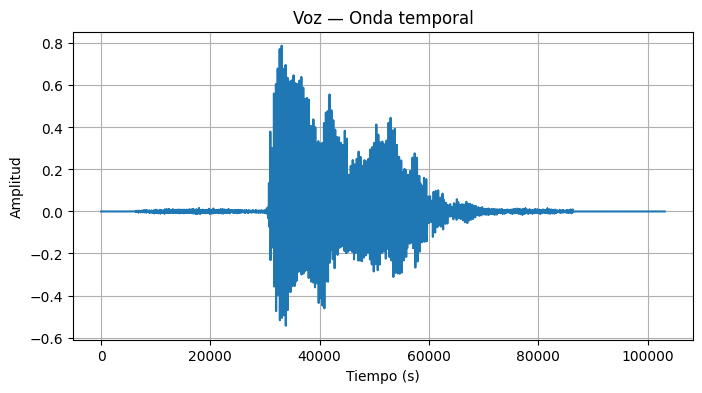

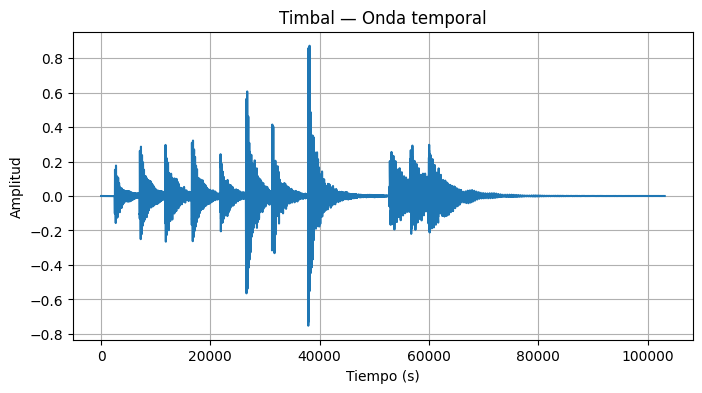

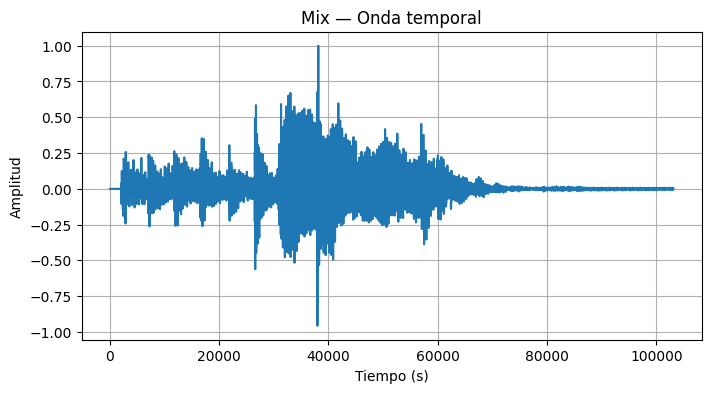

In [8]:
# graphs
t = np.arange(min_len)


plt.figure(figsize=(8, 4))
plt.plot(t, audio_piano)
plt.title("Piano")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(t, audio_voice)
plt.title("Voice")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(t, audio_timbal)
plt.title("Timbal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(t, mixed_audio)
plt.title("Mixed")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(t, sep_piano)
plt.title("Separated Piano")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(t, sep_voice)
plt.title("Separated Voice")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(t, sep_timbal)
plt.title("Separated Timbal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
